<a href="https://colab.research.google.com/github/Harshu1707/Data-Cleaning-Preprocessing-AIML/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your Titanic-Dataset.csv file


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv
File uploaded: Titanic-Dataset (1).csv
 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

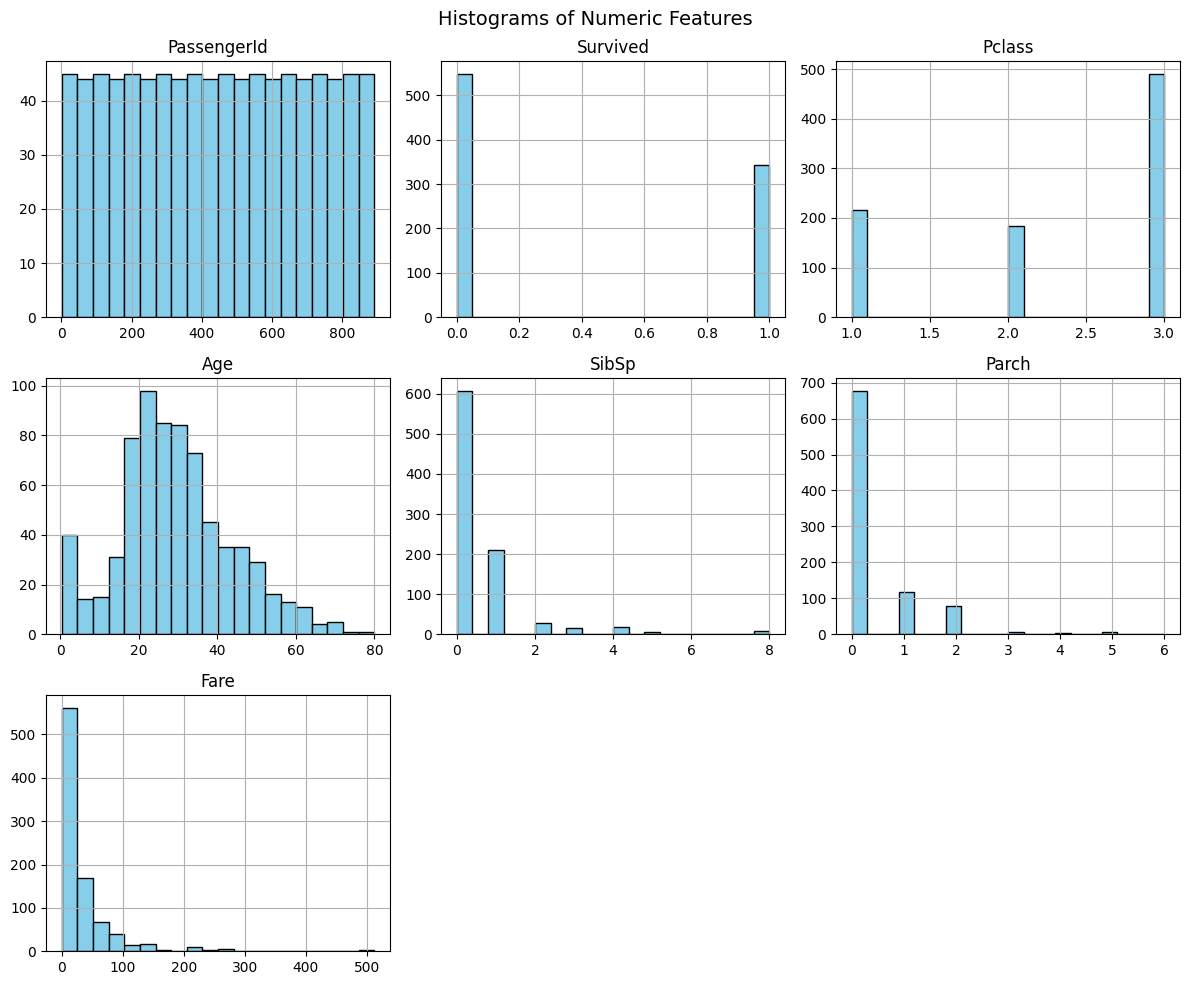

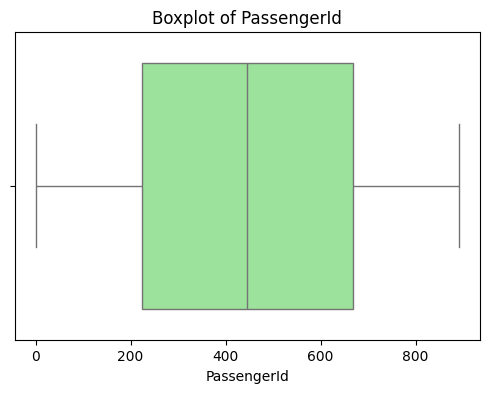

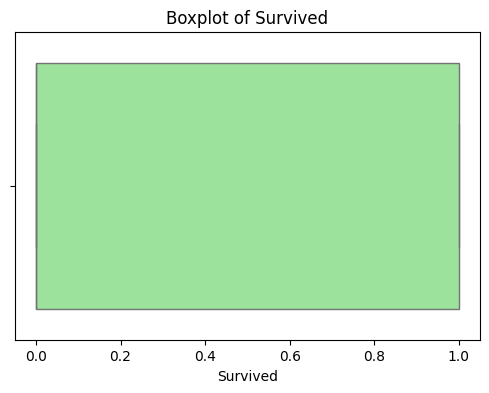

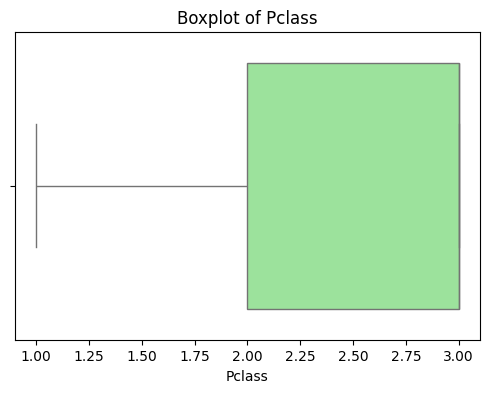

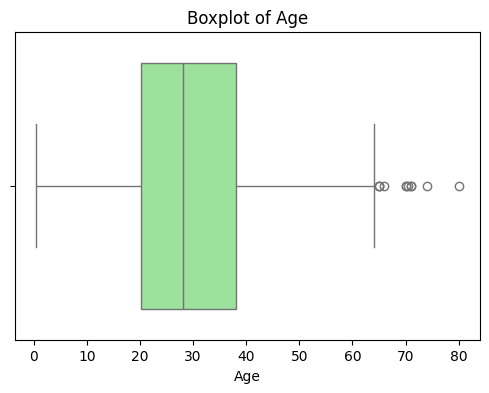

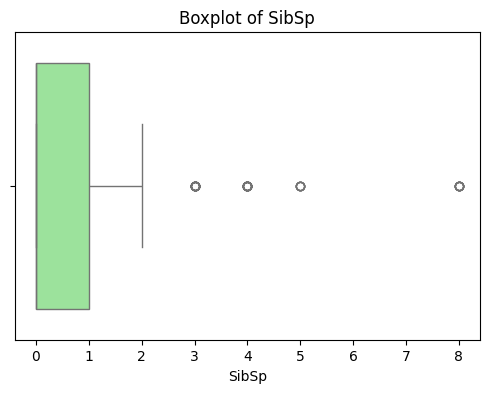

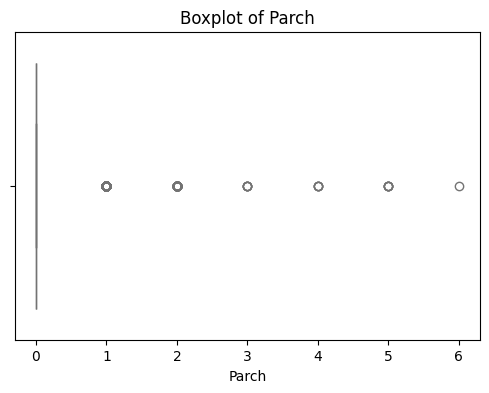

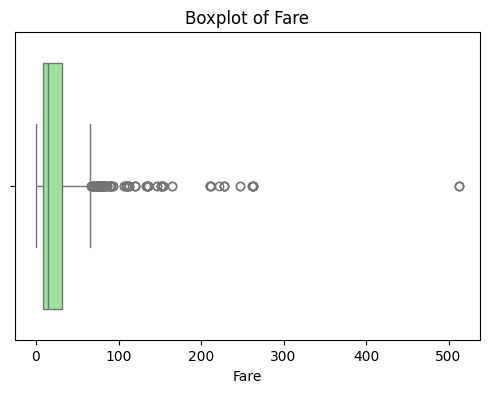

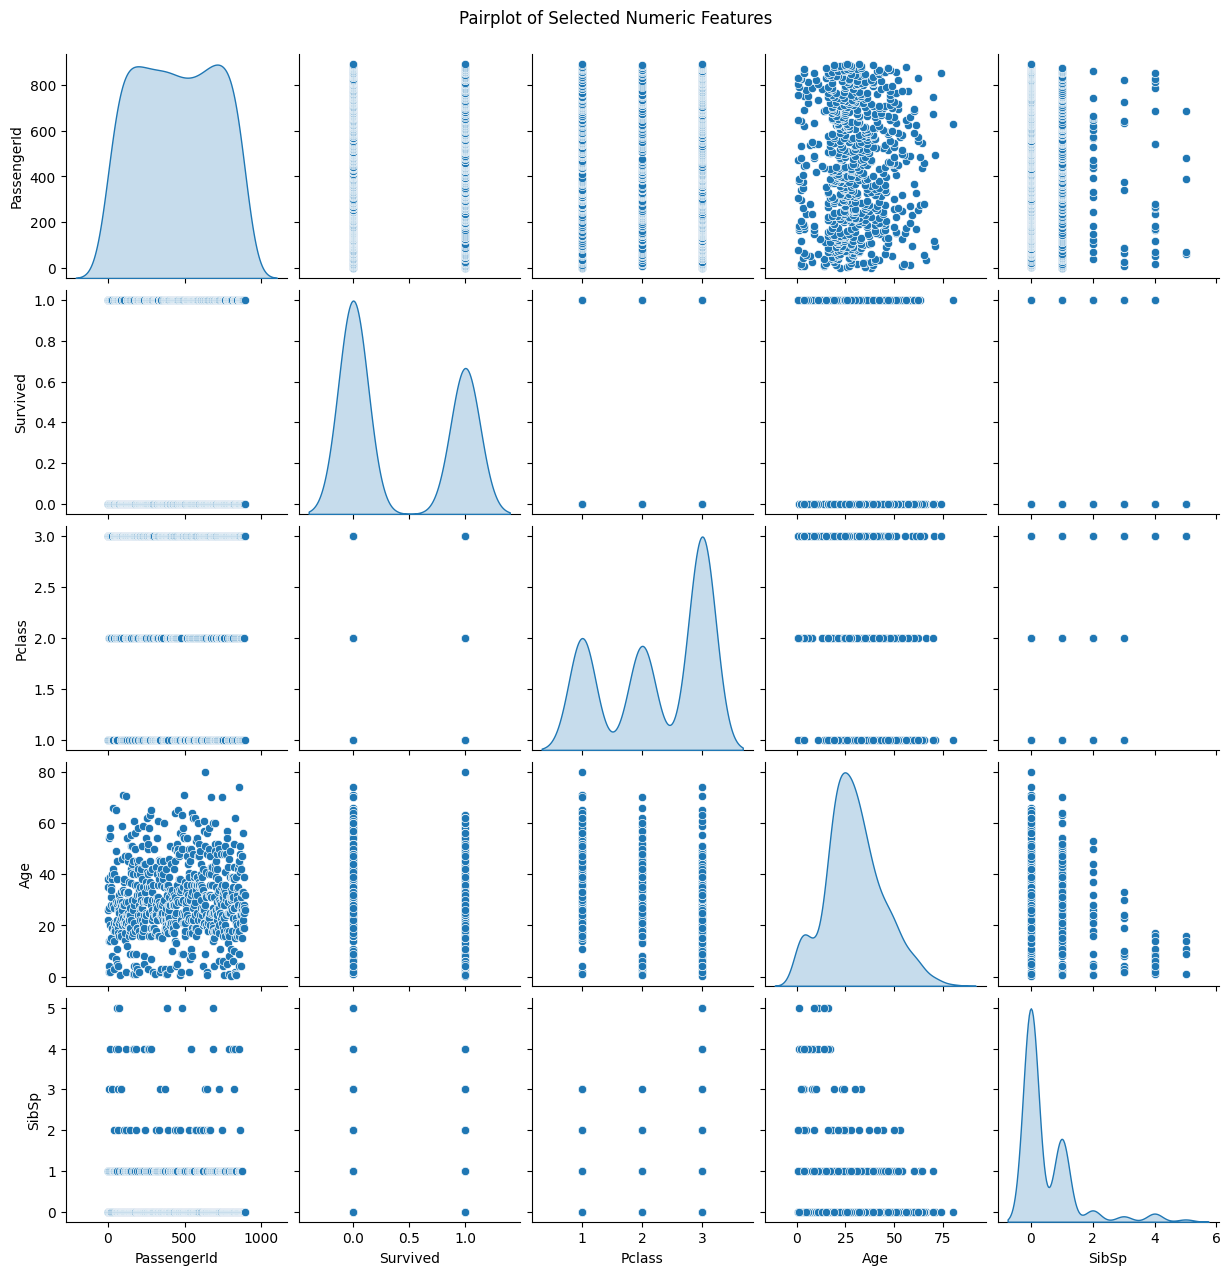

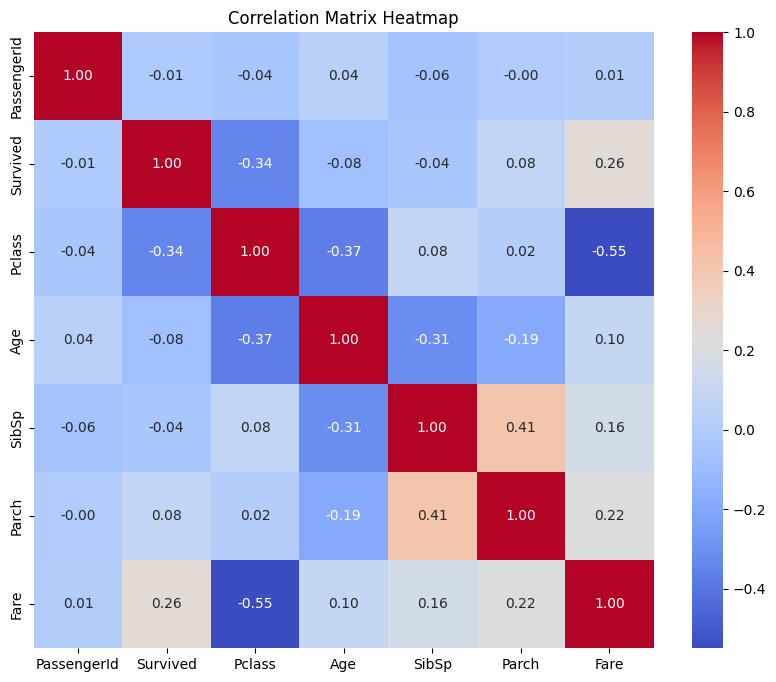


 Observations and Inferences:
PassengerId: Mean=446.00, Median=446.00, Std=257.35
Survived: Mean=0.38, Median=0.00, Std=0.49
Pclass: Mean=2.31, Median=3.00, Std=0.84
Age: Mean=29.70, Median=28.00, Std=14.53
SibSp: Mean=0.52, Median=0.00, Std=1.10
Parch: Mean=0.38, Median=0.00, Std=0.81
Fare: Mean=32.20, Median=14.45, Std=49.69

Basic Inferences:
- Look for skewed distributions in histograms (possible outliers).
- Boxplots highlight extreme values and spread differences.
- High correlation values (>0.7) suggest strong feature relationships.
- Pairplots can reveal clusters or separations (e.g., by class or survival).

 Analysis complete! Check generated images and summary CSV.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
print("Please upload your Titanic-Dataset.csv file")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
print(f"File uploaded: {file_path}")
df = pd.read_csv(file_path)


print(" Dataset Info:")
print(df.info())
print("\n First 5 Rows:")
print(df.head())


print("\n Summary Statistics:")
print(df.describe(include='all'))

df.describe(include='all').to_csv("summary_statistics.csv")
files.download("summary_statistics.csv")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=14)
plt.tight_layout()
plt.savefig("histograms.png")
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.savefig(f"boxplot_{col}.png")
    plt.show()


sample_cols = numeric_cols[:5]  # first few numeric columns only
sns.pairplot(df[sample_cols].dropna(), diag_kind='kde')
plt.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.savefig("pairplot.png")
plt.show()

plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

print("\n Observations and Inferences:")
for col in numeric_cols:
    col_mean = df[col].mean()
    col_median = df[col].median()
    col_std = df[col].std()
    print(f"{col}: Mean={col_mean:.2f}, Median={col_median:.2f}, Std={col_std:.2f}")

print("\nBasic Inferences:")
print("- Look for skewed distributions in histograms (possible outliers).")
print("- Boxplots highlight extreme values and spread differences.")
print("- High correlation values (>0.7) suggest strong feature relationships.")
print("- Pairplots can reveal clusters or separations (e.g., by class or survival).")

print("\n Analysis complete! Check generated images and summary CSV.")